         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602
Epoch 1/10
69/69 [==============================] - 4s 25ms/step - loss: 0.0090
Epoch 2/10
69/69 [==============================] - 2s 22ms/step - loss: 2.0916e-04
Epoch 3/10
69/69 [==============================] - 2s 22ms/step - loss: 1.3586e-04
Epoch 4/10
69/69 [==============================] - 2s 25ms/step - loss: 1.0472e-04
Epoch 5/10
69/69 [==============================] - 2s 25ms/step - loss: 9.4614e-05
Epoch 6/10
69/69 [==============================] - 2s 26ms/step - loss: 9.3518e-05
Epoch 7/10
69/69 [========

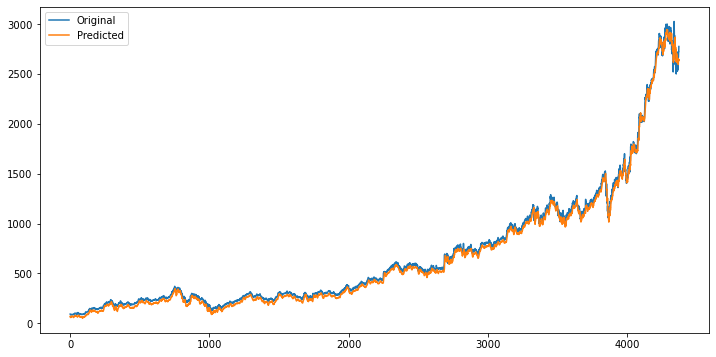

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\GOOGL.csv")  # <-- Put your file path here
print(df.head())

# Preprocess the data
data = df['Open'].values  # Taking only 'Open' prices
data = data.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=10, batch_size=64, verbose=1)

# Predict on the same data
train_predict = model.predict(X)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
original_y = scaler.inverse_transform(y.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12,6))
plt.plot(original_y, label='Original')
plt.plot(train_predict, label='Predicted')
plt.legend()
plt.show()
